In [7]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3


'%.3f'

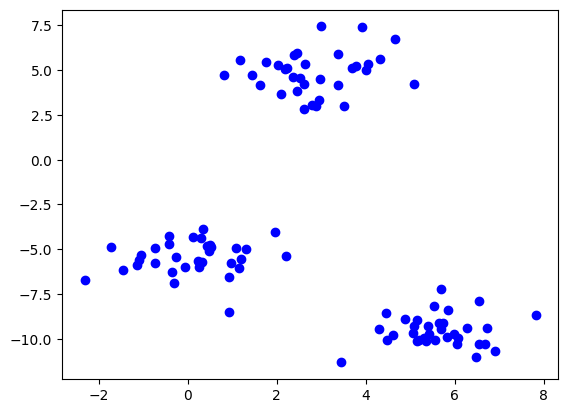

In [8]:
#k-means를 사용하기 위해 임포트
from sklearn.cluster import KMeans

#데이터를 생성하기 위해 임포트
from sklearn.datasets import make_blobs

#샘플 데이터 생성
#주의 : make_blobs은 두 개의 값을 반환하므로
#한쪽은 사용하지 않는 _로 입력 받음
X, _ = make_blobs(random_state=10)

#그래프 출력
#color 옵션으로 색 지정 가능
plt.scatter(X[:,0],X[:,1],color='blue')

In [9]:
# KMeans 클래스 초기화
kmeans = KMeans(n_init = 'auto', init='random', n_clusters=3)

# 군집 중심점 계산
kmeans.fit(X)

# 군집번호 예측
y_pred = kmeans.predict(X)

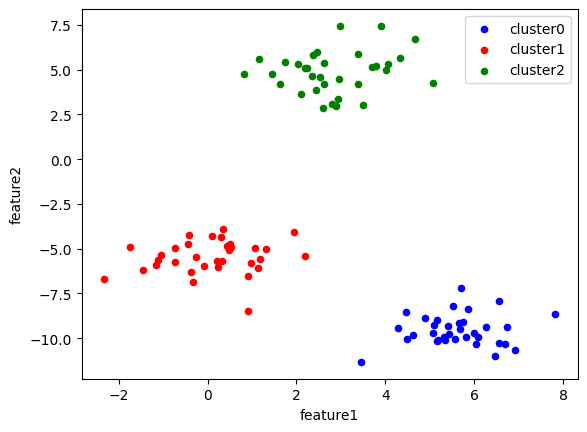

In [10]:
# concat로 데이터를 가로 반향으로 결함(axis=1 지정)
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]),
pd.DataFrame(y_pred)], axis=1)

# 위의 데이터에 X축을 eature1, Y축을 eature2, 군집번호를 cluster로 컬럼 이름 설정
merge_data.columns = ['feature1', 'feature2', 'cluster']

# 군집 결과를 시각화
ax = None
color = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=color[i],
    label=f'cluster{i}', ax=ax)

In [11]:
import requests, zipfile
import io

In [12]:
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [13]:
bank= pd.read_csv('bank-full.csv', sep=';')

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
print('데이터 형식(X,y):{}'.format(bank.shape))
print('결측값 수:{}'.format(bank.isnull().sum().sum()))

데이터 형식(X,y):(45211, 17)
결측값 수:0


In [15]:
from sklearn.preprocessing import StandardScaler

bank_sub = bank[['age', 'balance', 'campaign', 'previous']]

sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


4    14734
0    24509
2     2684
1      221
5     1683
3     1380
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

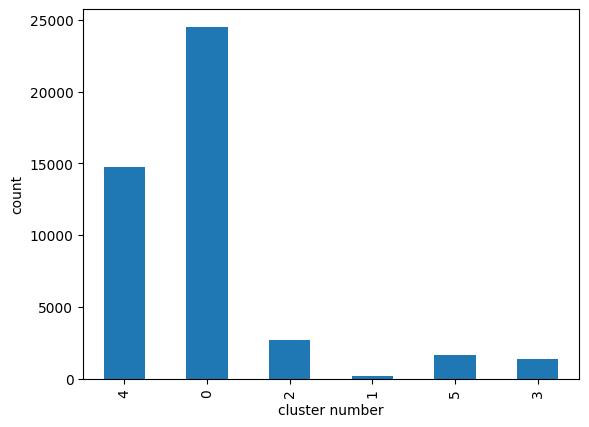

In [16]:
# KMeans 클래스 초기화
kmeans = KMeans(n_init='auto', init='random', n_clusters=6, random_state=0)

# 군집 중심 계산
kmeans.fit(bank_sub_std)

# 군집 번호를 판다스 Series 객체로 변환
labels = pd.Series(kmeans.labels_, name='cluster_number')

# 군집 번호와 데이터 개수 출력
print(labels.value_counts(sort=False))

# 그래프 출력
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')


Text(0, 0.5, 'Distortion')

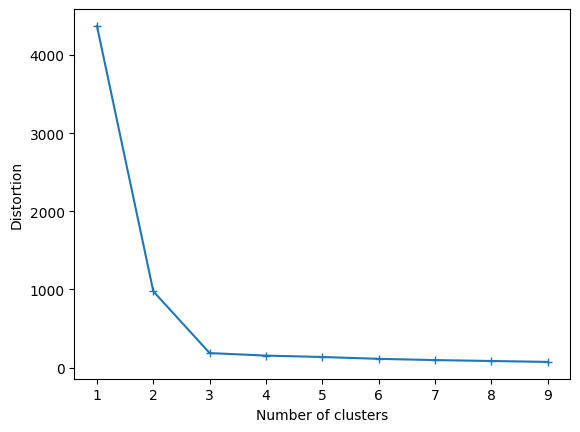

In [17]:
# 엘보우법으로 추정, 군집 수를 1에서 10까지 증가시켜 거리의 총합 계산
dist_list = []
for i in range(1,10):
    kmeans=KMeans(n_init='auto', n_clusters=i, init='random', random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)

# 그래프 출력
plt.plot(range(1,10), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

Text(0, 0.5, 'Distortion')

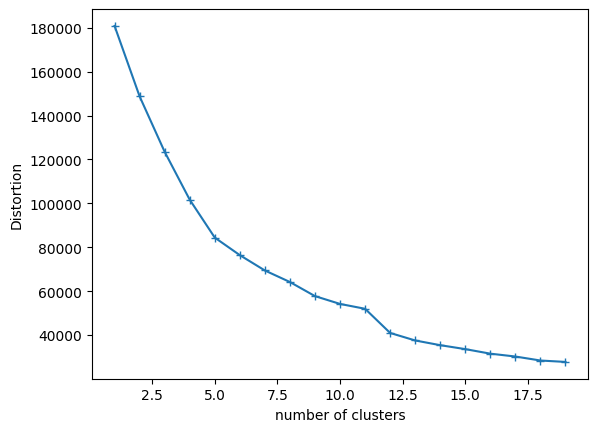

In [18]:
dist_list = []
for i in range(1,20):
    kmeans = KMeans(n_init='auto', n_clusters=i, init='random', random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)

plt.plot(range(1,20), dist_list, marker ='+')
plt.xlabel('number of clusters')
plt.ylabel('Distortion')

In [19]:
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import SilhouetteVisualizer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(data = scaler.fit_transform(bank_sub),
                          columns=bank_sub.columns)
scaled_df.shape
scaled_df.head(5)

,age,balance,campaign,previous
0,0.519481,0.092259,0.0,0.0
1,0.337662,0.073067,0.0,0.0
2,0.194805,0.072822,0.0,0.0
3,0.376623,0.086476,0.0,0.0
4,0.194805,0.072812,0.0,0.0


SilhouetteVisualizer(ax=<Axes: >,
                     estimator=KMeans(init='random', n_clusters=5,
                                      n_init='auto', random_state=111))

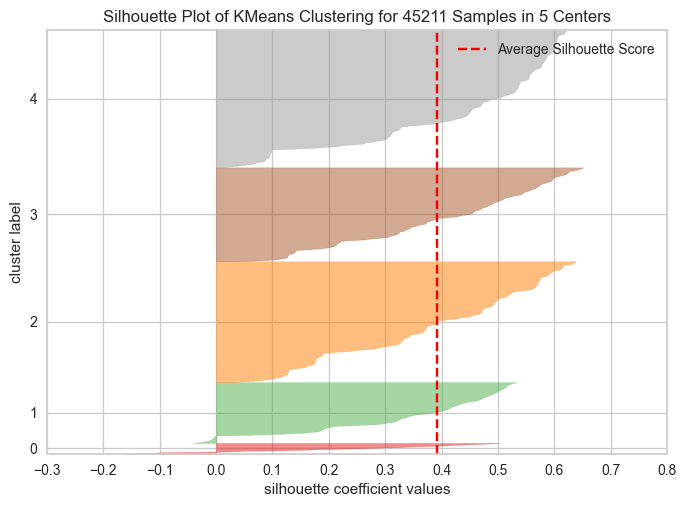

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 45211 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
kmeans_2 = KMeans(n_init = 'auto', n_clusters=5, random_state=111, init='random')

visualizer_2 = SilhouetteVisualizer(kmeans_2, color='yellowbrick')

visualizer_2.fit(scaled_df)
visualizer_2.show()

SilhouetteVisualizer(ax=<Axes: >,
                     estimator=KMeans(init='random', n_clusters=3,
                                      n_init='auto', random_state=111))

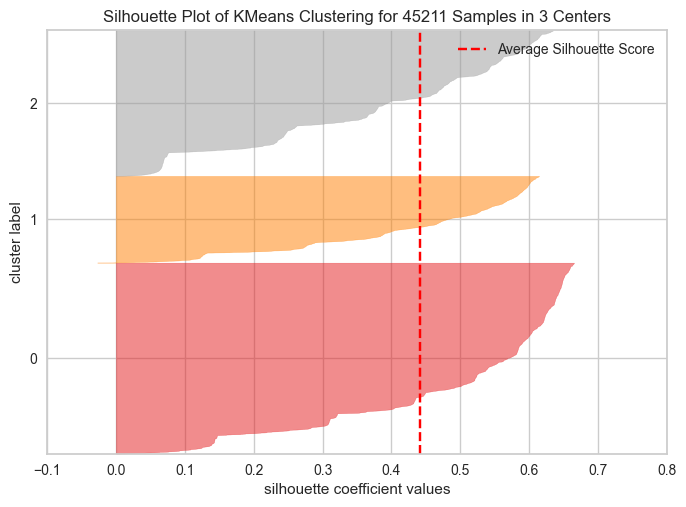

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 45211 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
kmeans_3 = KMeans(n_init = 'auto', n_clusters=3, random_state=111, init='random')

visualizer_3 = SilhouetteVisualizer(kmeans_3, color='yellowbrick')

visualizer_3.fit(scaled_df)
visualizer_3.show()

In [25]:
result_df = scaled_df.copy()

result_df.loc[:, 'clusterID'] = visualizer_3.predict(scaled_df)

result_df.loc[:, 'silhouette coefficient'] = visualizer_3.silhouette_samples_

result_df.shape
result_df.head(5)

(45211, 6)

,age,balance,campaign,previous,clusterID,silhouette coefficient
0,0.519481,0.092259,0.0,0.0,1,0.598221
1,0.337662,0.073067,0.0,0.0,2,0.612210
2,0.194805,0.072822,0.0,0.0,0,0.581309
3,0.376623,0.086476,0.0,0.0,2,0.466087
4,0.194805,0.072812,0.0,0.0,0,0.581299


In [26]:
print('전체 데이터의 실루엣 계수 평균')
result_df['silhouette coefficient'].mean()

print('\n 군집별 실루엣 계수 평균')
result_df.groupby('clusterID')['silhouette coefficient'].mean().reset_index()

전체 데이터의 실루엣 계수 평균


0.441


 군집별 실루엣 계수 평균


,clusterID,silhouette coefficient
0,0,0.495315
1,1,0.434325
2,2,0.373880


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(init='random', n_clusters=2,
                                      n_init='auto', random_state=111))

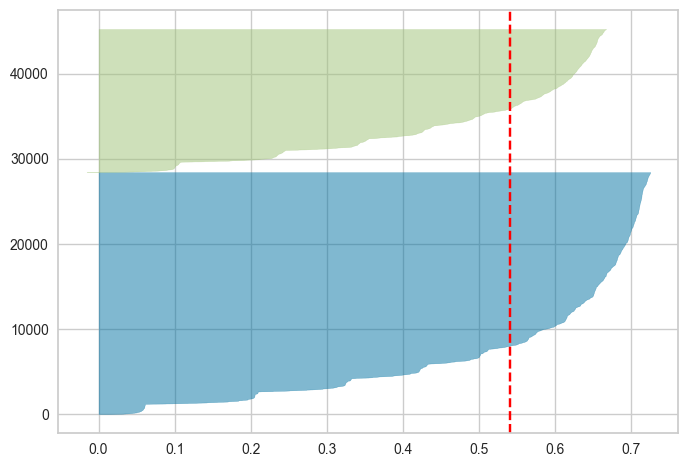

In [30]:
kmeans_4 = KMeans(n_init = 'auto', n_clusters= 2, random_state=111, init='random')

visualizer_4 = SilhouetteVisualizer(kmeans_4, colors='yellowbrick')

visualizer_4.fit(scaled_df)

In [31]:


result_df_2 = scaled_df.copy()

result_df_2.loc[:,'clusterID'] = visualizer_4.predict(scaled_df)
result_df_2.loc[:, 'silhouette coefficient'] = visualizer_4.silhouette_samples_

result_df_2.shape
result_df_2.head(5)

(45211, 6)

,age,balance,campaign,previous,clusterID,silhouette coefficient
0,0.519481,0.092259,0.0,0.0,1,0.640030
1,0.337662,0.073067,0.0,0.0,1,0.099263
2,0.194805,0.072822,0.0,0.0,0,0.709126
3,0.376623,0.086476,0.0,0.0,1,0.427423
4,0.194805,0.072812,0.0,0.0,0,0.709121


In [34]:
print('n_clutsters = 2의 전체 데이터의 실루엣 계수 평균')
result_df_2['silhouette coefficient'].mean()

print('\nn_clusters = 2의 군집별 실루엣 계수 평균')
result_df_2.groupby('clusterID')['silhouette coefficient'].mean().reset_index()

print('\nn_clusters = 3의 전체 데이터의 실루엣 계수평균')
result_df['silhouette coefficient'].mean()

print('\nn_clusters = 3의 군집별 실루엣 계수 평균')
result_df.groupby('clusterID')['silhouette coefficient'].mean().reset_index()

n_clutsters = 2의 전체 데이터의 실루엣 계수 평균


0.541


n_clusters = 2의 군집별 실루엣 계수 평균


,clusterID,silhouette coefficient
0,0,0.568914
1,1,0.492653



n_clusters = 3의 전체 데이터의 실루엣 계수평균


0.441


n_clusters = 3의 군집별 실루엣 계수 평균


,clusterID,silhouette coefficient
0,0,0.495315
1,1,0.434325
2,2,0.373880


In [35]:
bank_with_cluster = pd.concat([bank, labels], axis=1)

bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [36]:
# 구간 분할 간격 설정
bins = [15,20,25,30,35,40,45,50,55,60,65,100]

# 위의 기준으로 금융기관 데이터를 분할하고, qcut_age 변수에 각 데이터 연령층 설정
qcut_age = pd.cut(bank_with_cluster.age, bins, right=False)

# 군집 번호와 연령층 결합
df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis=1)

# 군집 번호와 연령층 기준으로 집계하고 연령층르 컬럼으로 설정
cross_cluster_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,45,711,4024,8492,7146,4091,0,0,0,0,0
1,0,3,10,37,25,26,27,30,38,11,14
2,0,14,152,497,517,460,375,306,263,63,37
3,0,20,132,327,308,187,146,117,71,38,34
4,0,0,0,0,0,1155,4701,3885,3436,838,719
5,2,14,146,387,353,266,221,150,114,24,6


In [37]:
hist_age = pd.value_counts(qcut_age)
hist_age

[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: age, dtype: int64

<Axes: xlabel='age', ylabel='cluster_number'>

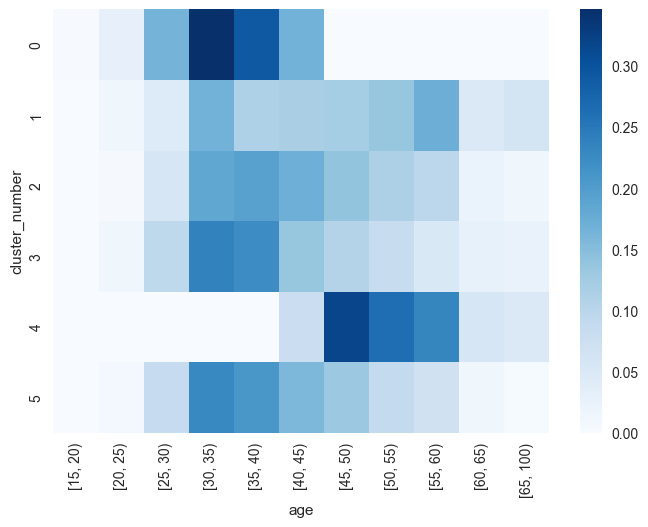

In [38]:
sns.heatmap(cross_cluster_age.apply(lambda x : x/x.sum(), axis=1), cmap = 'Blues')

In [39]:
cross_cluster_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0)
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,3097,5610,728,426,5130,57,852,2564,813,4459,698,75
1,15,12,19,7,91,24,11,9,3,21,6,3
2,219,459,91,70,788,111,130,189,48,460,99,20
3,196,244,42,22,332,53,41,112,52,250,31,5
4,1467,3040,543,675,2732,1984,479,1124,4,2084,439,163
5,177,367,64,40,385,35,66,156,18,323,30,22


<Axes: xlabel='job', ylabel='cluster_number'>

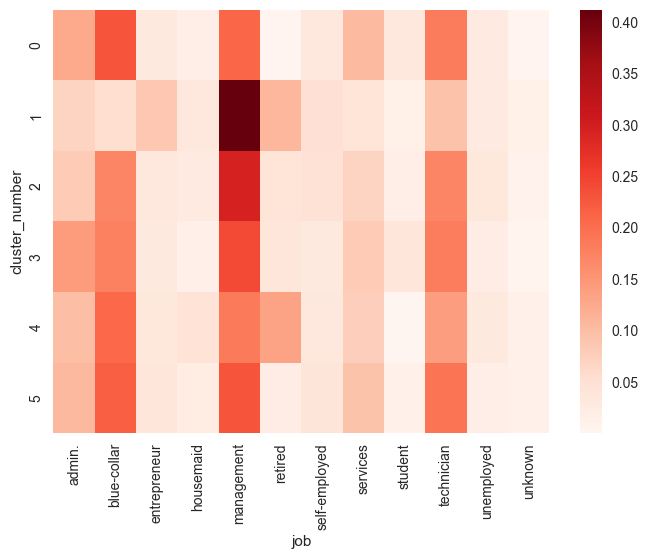

In [41]:
sns.heatmap(cross_cluster_job.apply(lambda x : x/x.sum(), axis=1), cmap='Reds')